In [1]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Wrangle data
#trends of bechdel pass/fail over time
#visualize different types of the test
#examine time trends of revenue
#examine trends over time

In [33]:
#We will examine data for thousands of movies to see how it correlates with the Bechdel test.

bechdelDataset = pd.read_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/DataVis/bechdel_clean.csv')
imdbDataset = pd.read_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/DataVis/updated_movie_data.csv', encoding = 'ISO-8859-1')
revenuesDataset = pd.read_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/DataVis/revenue.csv', encoding = 'ISO-8859-1')

print("Bechdel Dataset: ")
bechdelDataset.isnull().sum()
print(len(bechdelDataset))

Bechdel Dataset: 
1794


In [4]:
print("IMDB Dataset: ")
imdbDataset.isnull().sum()

IMDB Dataset: 


Unnamed: 0                     0
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
print("Revenues Dataset: ")
revenuesDataset.isnull().sum()

Revenues Dataset: 


Unnamed: 0        0
Released          0
Movie             0
Genre          4727
Budget        15929
Revenue           0
Trailer       19081
Year              0
dtype: int64

In [6]:
bechdelDataset = bechdelDataset.fillna(value=0)
bechdelDataset.head()

,imdb_id,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,1711425,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,1343727,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2024544,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,1272878,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,453562,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


In [7]:
bechdelDataset.isnull().sum()

imdb_id           0
year              0
imdb              0
title             0
test              0
clean_test        0
binary            0
budget            0
domgross          0
intgross          0
code              0
budget_2013$      0
domgross_2013$    0
intgross_2013$    0
period code       0
decade code       0
dtype: int64

In [8]:
imdbDataset['color'].fillna(value={'color':'', 'director_name':'', 'num_critic_for_reviews':0,'duration':0,'director_facebook_likes':0,
  'actor_3_facebook_likes':0, 'actor_2_name': '', 'actor_1_facebook_likes':0, 'gross':0, 'actor_1_name':'', 'actor_3_name':'', 'facenumber_in_poster':'', 'plot_keywords':'',
   'num_user_for_reviews': 0, 'language': '', 'country': '', 'content_rating': '' , 'budget': 0, 'title_year': 0, 'actor_2_facebook_likes':0,
   'aspect_ratio': 0}, inplace=True)
imdbDataset = imdbDataset.rename(columns={imdbDataset.columns.values[0] : 'imdb_id'})

imdbDataset.head()

,imdb_id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,499549,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,449088,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,2379713,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,1345836,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5289954,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [27]:
revenuesDataset = revenuesDataset.fillna(value=0)
revenuesDataset.head()

,Unnamed: 0,Released,Movie,Genre,Budget,Revenue,Trailer,Year
0,0,1/28/14 0:00,1,Documentary,0.0,0,0,2014
1,1,6/8/12 0:00,1 Out Of 7,Drama,0.0,0,0,2012
2,2,10/5/79 0:00,10,Romantic Comedy,0.0,52134699,0,1979
3,3,3/7/08 0:00,"10,000 B.C.",Adventure,105000000.0,94784201,0,2008
4,4,8/31/13 0:00,10 Habits of Highly Effective People,0,0.0,0,0,2013


In [28]:
bechdelReducedDataset = bechdelDataset[['imdb_id','binary', 'test', 'clean_test', 'domgross', 'intgross','budget_2013$','domgross_2013$','intgross_2013$']].copy()
mergedDataset = pd.merge(left=imdbDataset, right=bechdelReducedDataset, how='outer', on='imdb_id')
mergedDataset.columns.values

array(['imdb_id', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'binary', 'test', 'clean_test', 'domgross',
       'intgross', 'budget_2013$', 'domgross_2013$', 'intgross_2013$'], dtype=object)

In [11]:
mergedDataset.groupby(['binary', 'test']).size()

binary  test            
FAIL    dubious              86
        dubious-disagree     63
        men                 126
        men-disagree         70
        notalk              390
        notalk-disagree     139
        nowomen              95
        nowomen-disagree     54
PASS    ok                  717
        ok-disagree         112
dtype: int64

In [12]:
mergedDataset.groupby(['binary', 'clean_test']).size()


binary  clean_test
FAIL    dubious       149
        men           196
        notalk        529
        nowomen       149
PASS    ok            829
dtype: int64

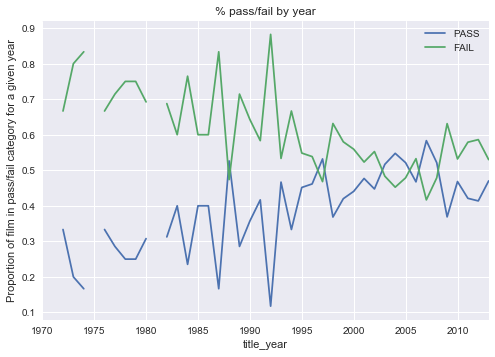

In [29]:
mergedSet = mergedDataset[(mergedDataset.title_year != 0.0)].groupby(['title_year', 'binary']).size()
mergedSet = mergedSet.unstack('binary')
plt.figure()
((mergedSet.PASS)/(mergedSet.PASS+mergedSet.FAIL)).plot()

ax = ((mergedSet.FAIL)/(mergedSet.PASS+mergedSet.FAIL)).plot(title='% pass/fail by year')

ax.legend(labels=['PASS', 'FAIL'], loc='best')
ax.set_ylabel("Proportion of film in pass/fail category for a given year")

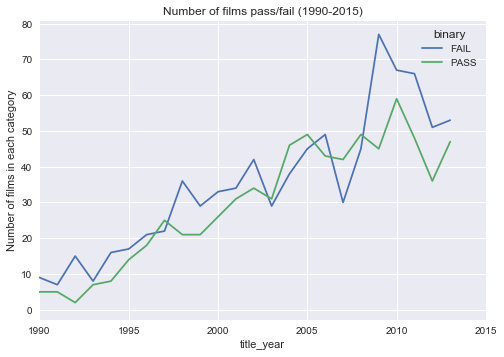

In [30]:
ax = mergedSet.plot(xlim=[1990,2015], title='Number of films pass/fail (1990-2015)')
ax.set_ylabel("Number of films in each category")
#whats with the dip for passing the test in 1992 and dip for failing the test in 2007

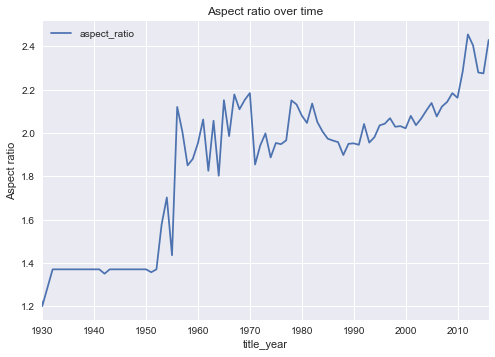

In [15]:
#lets plot the aspect ratios of the films(the ratio used during presentation in a theater) out of curiosity
aspectYear = mergedDataset[(mergedDataset.title_year != 0.0) & (mergedDataset.aspect_ratio != 0.0)][['title_year', 'aspect_ratio']]
ax = aspectYear.groupby(['title_year']).mean().plot(xlim=[1930,2016], title='Aspect ratio over time')
ax.set_ylabel("Aspect ratio")

In [16]:
#they seem to have stagnated from 1960 to 1980, but we begin to see an increase from 1989 to 2015 onwards

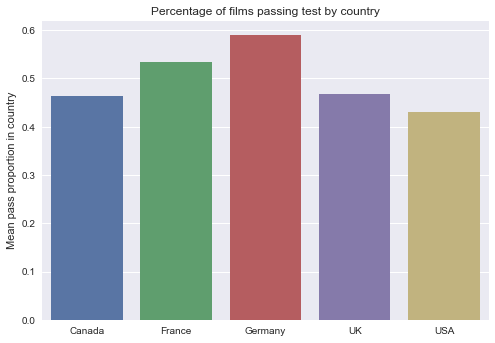

In [17]:
#lets visualize the pass rates among the US, UK, France, Canada and Germany
#not enough data for China or India since this an English-focused dataset
theSet = mergedDataset[((mergedDataset.binary == 'FAIL') | (mergedDataset.binary == 'PASS')) & (mergedDataset.country.isin(['Canada', 'USA', 'UK','France','Germany']))].groupby(['binary', 'country']).size()
theSet = theSet.unstack('binary')
theSet['PASS proportion'] = theSet.PASS/(theSet.PASS+theSet.FAIL)
ax = sns.barplot(x=theSet.index.values, y=theSet['PASS proportion'], data=theSet)
ax.set_title('Percentage of films passing test by country')
ax.set(ylabel='Mean pass proportion in country')


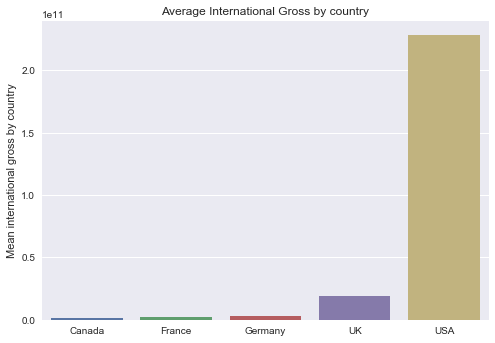

In [18]:
#rank international gross for American vs the rest of the world
intGrossSet = mergedDataset[(mergedDataset.intgross != 0) & (mergedDataset.country.isin(['Canada', 'USA', 'UK','France','Germany'])) & (mergedDataset.domgross != 0)][['country','intgross','domgross']].groupby('country').sum()
ax = sns.barplot(x=intGrossSet.index.values, y=intGrossSet['intgross'], data=intGrossSet)
ax.set_title('Average International Gross by country')
ax.set(ylabel='Mean international gross by country')



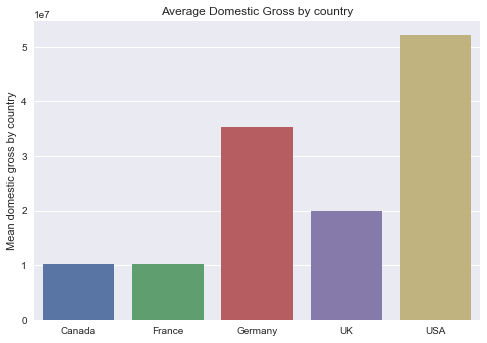

In [19]:
intGrossSet = mergedDataset[(mergedDataset.domgross != 0) & (mergedDataset.country.isin(['Canada', 'USA', 'UK','France','Germany'])) & (mergedDataset.domgross != 0)][['country','intgross','domgross']].groupby('country').median()
ax = sns.barplot(x=intGrossSet.index.values, y=intGrossSet['domgross'], data=intGrossSet)
ax.set_title('Average Domestic Gross by country')
ax.set(ylabel='Mean domestic gross by country')


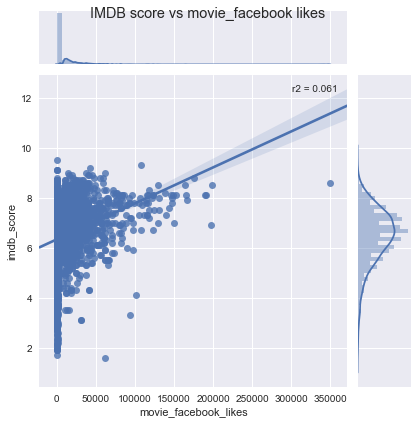

In [20]:
#hmm looks like the median for Germany is almost on par with the USA
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
#lets look at facebook_likes vs imdb_score
sns.jointplot(x="movie_facebook_likes", y="imdb_score", data=mergedDataset,kind="reg", stat_func=r2).fig.suptitle('IMDB score vs movie_facebook likes')


In [21]:
#little correlation between imdb score and movie facebook likes
#We will want to explore an expanded dataset of Bechdel data by country and also focus on its trend over time.

In [22]:
#We will now fill in the rest of the Bechdel data.

In [23]:
mergedDataset.isnull().sum()

imdb_id                         0
color                         145
director_name                 230
num_critic_for_reviews        176
duration                      141
director_facebook_likes       230
actor_3_facebook_likes        149
actor_2_name                  139
actor_1_facebook_likes        133
gross                        1010
genres                        126
actor_1_name                  133
movie_title                   126
num_voted_users               126
cast_total_facebook_likes     126
actor_3_name                  149
facenumber_in_poster          139
plot_keywords                 279
movie_imdb_link               126
num_user_for_reviews          147
language                      138
country                       131
content_rating                429
budget                        618
title_year                    234
actor_2_facebook_likes        139
imdb_score                    126
aspect_ratio                  455
movie_facebook_likes          126
binary        

In [24]:
import requests

def queryBechdelAPI(imdbId):
    imdbId = str(imdbId)
    if (len(imdbId) == 6):
        imdbId = '0' + imdbId
    r = requests.get("http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid="+str(imdbId))
    binary = 'FAIL'
    testRating = None
    print(r.json())
    if (r.status_code == requests.codes.ok and 'status' not in r.json().keys()):
       if (r.json()['rating'] == '3' and r.json()['dubious'] == '0'):
          binary = 'PASS'
          testRating = 'ok'
       elif (r.json()['dubious'] == '1'):
          testRating = 'dubious'
       elif (r.json()['rating'] == '0'):
          testRating = 'nowomen'
       elif (r.json()['rating'] == '1'):
          testRating = 'notalk'
       elif (r.json()['rating'] == '2'):
          testRating = 'men'    
        
    return binary, testRating, r.status_code            

In [32]:
len(mergedDataset)

5169

In [45]:
theIds = mergedDataset[mergedDataset.binary.notnull()]['imdb_id']
print(theIds)
index = [i for i in range(1, len(theIds) + 1)]
baseIds = pd.DataFrame(data={"imdb_ids": theIds})
savedDataset = baseIds.to_csv('theBaseIds.csv')

0        499549
1        449088
3       1345836
5        401729
8        398286
10       417741
12       348150
13       830515
14       383574
15      1210819
16       770828
17       499448
18       848228
19       848228
20      1298650
21      1409024
23       948470
24       955308
25      1170358
26       385752
27       360717
28       360717
29       360717
30       120338
32      1440129
34      1074638
35      1074638
36       316654
37      1300854
38      1014759
         ...   
5139     114319
5140     114323
5141     114746
5142     110889
5143     111282
5144     103893
5145     104412
5146     105151
5147     101414
5148      99817
5149     100263
5150      96438
5151      93409
5152      93870
5153      89469
5154      87332
5155      84827
5156      82495
5157      80716
5158      80761
5159      78767
5160      77402
5161      77713
5162      74156
5163      75249
5164      73629
5165      71222
5166      72308
5167      67741
5168      67800
Name: imdb_id, Length: 1